# Computers, Waves and Simulations:
## Finite-difference method - first derivative

#### This exercise covers the following aspects:
* Calculation of numerical first derivative
* Comparison with analytical solution
* Dependence of error on space increment

In [1]:
# Import libraries
import numpy as np
from math import *
import matplotlib.pyplot as plt

We initialise (british speach) a space-dependent cossine function

\begin{equation}
f(x)= \cos (k x)
\end{equation}

where the wavenumber k is

\begin{equation}
k = \dfrac{2 \pi}{\lambda}
\end{equation}

and $\lambda$ is wavelength.

In [2]:
# Initial parameters
xmax = 10.0      # physical domain (m)
nx =  200        # number os samples
dx = xmax/(nx-1) # grid increment dx (m)
x  = np.linspace(0,xmax,nx) # space coordinates

# Initialization of sin function
l = 20*dx        # wavelength (20 times de grid increment)
k = 2*pi/l       # wavenumber
f = np.cos(k*x)  # f is a vector and x indeed while k is a scalar number

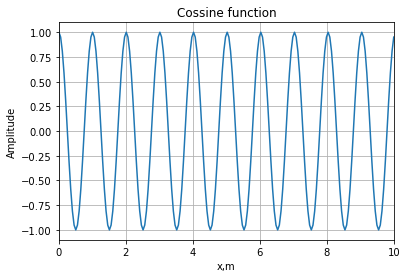

In [7]:
# Plot sin function
plt.plot(x, f)
plt.title('Cossine function')
plt.xlabel('x,m')
plt.ylabel('Amplitude')
plt.xlim((0,xmax))
plt.grid()
plt.show()

In the cell below we calculate the central finite-difference derivative of f(x) using two points

\begin{equation} 
f^{\prime}(x)=\dfrac{f(x+dx)-f(x-dx)}{2dx}
\end{equation} 

and  compare with the analytical derivative

\begin{equation} 
f^{\prime}(x) = - k \sin(k x)
\end{equation} 

In [8]:
# First derivative with two points

# Initiation of numerical and analytical derivatives
nder = np.zeros(nx)        # numerical derivative
ader = np.zeros(nx)        # analytical derivative

# Numerical derivative of the given function
for i in range (1, nx-1):
    nder[i] = (f[i+1]-f[i-1])/(2*dx)
    
# Analytical derivative of the given function
ader = - k * np.sin(k*x)
# Exclude boundaries to avoid problems in the error calculation 'cause the derivatives at these points are not calculated
ader[0]=0.
ader[nx-1]=0.

# Error (rms)
rms = np.sqrt(np.mean(nder-ader)**2)

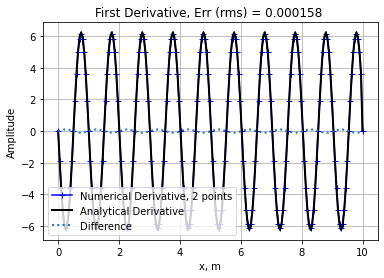

In [9]:
# Plotting
plt.plot (x, nder, label="Numerical Derivative, 2 points", marker='+', color="blue")
plt.plot (x, ader, label="Analytical Derivative", lw=2, ls="-", color="black")
plt.plot (x, nder-ader, label="Difference", lw=2, ls=":")
plt.title("First Derivative, Err (rms) = %.6f " %(rms))
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.grid()
plt.show()

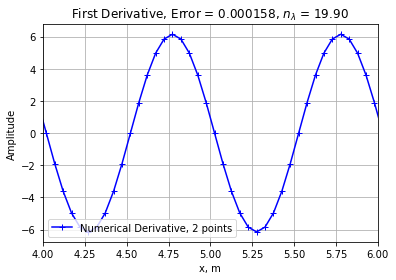

In [10]:
# Plotting number of points per wavelength 
plt.plot (x, nder, label="Numerical Derivative, 2 points", marker="+", color="blue")
plt.title("First Derivative, Error = %.6f, $n_\lambda$ = %.2f" % (rms, 1/dx))
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.xlim((xmax/2-1, xmax/2+1))
plt.grid()
plt.show()